<a href="https://colab.research.google.com/github/VerabelGonzales/Computer-Vision-Project-Alpha-Vision/blob/main/Collect_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Collect Images from Google**

Course: Computer Vision - II (2021)

This notebook contains functions to download images from Google Images using Selenium.

## 1. Install and Import Selenium Driver

In [1]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
import requests
import os
import time
import io
from PIL import Image
import hashlib
import getopt
import sys

# Create the driver
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',options=options)

     |████████████████████████████████| 979 kB 16.7 MB/s 
     |████████████████████████████████| 359 kB 49.5 MB/s 
     |████████████████████████████████| 138 kB 50.2 MB/s 
     |████████████████████████████████| 4.0 MB 45.7 MB/s 
     |████████████████████████████████| 55 kB 1.8 MB/s 
     |████████████████████████████████| 58 kB 4.5 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.9 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 http://archive.ubuntu.com/ubunt

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


## 2. Download images

Serching 5 images of golden


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead


Found: 100 search results. Extracting links from 0:100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead


Found: 2 image links, looking for more ...
Found: 5 image links, looking for more ...
Found: 7 image links, looking for more ...
Found: 9 image links, looking for more ...
Found: 11 image links, looking for more ...
Found: 13 image links, looking for more ...
Found: 15 image links, done!
SUCCESS - saved https://www.vieravet.com/sites/default/files/styles/large/public/golden-retriever-dog-breed-info.jpg?itok=LCRMRkum - as ./images/golden/941e2e75d5.jpg
ERROR - Could not download - No connection adapters were found for ''
ERROR - Could not save - local variable 'image_content' referenced before assignment
ERROR - Could not download - No connection adapters were found for ''
ERROR - Could not save - local variable 'image_content' referenced before assignment
SUCCESS - saved https://www.thesprucepets.com/thmb/tdJHMIPGGgekxBiuxXXIfwGEbbI=/1500x844/smart/filters:no_upscale()/dog-breed-profile-golden-retriever-1117969-hero-da398f6462704058ace0ef5ae007866d.jpeg - as ./images/golden/0a636aa08f.
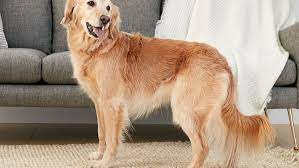
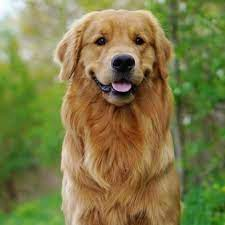
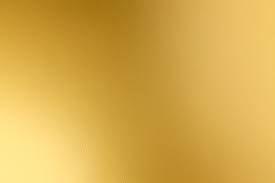
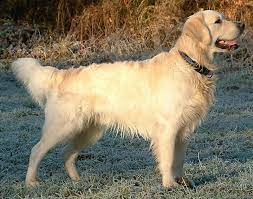
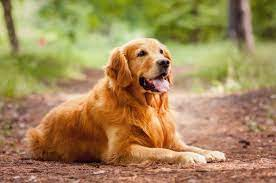
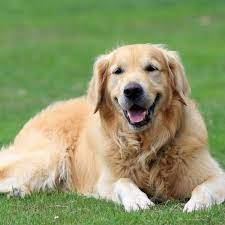

In [27]:
# Based and improved on Jiwitesh's repository: ImageScrapper (https://github.com/jiwitesh/ImageScrapper)
def fetch_image_urls(query:str, max_links_to_fetch:int, wd:webdriver, sleep_between_interactions:int=1):
  def scroll_to_end(wd):
      wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")
      time.sleep(sleep_between_interactions)    
  
  # Build the google query
  search_url = "https://www.google.com/search?safe=off&site=&tbm=isch&source=hp&q={q}&oq={q}&gs_l=img"

  # Load the page
  wd.get(search_url.format(q=query))

  image_urls = []
  image_count = 0
  results_start = 0
  while image_count < max_links_to_fetch:
    scroll_to_end(wd)

    while len(image_urls) < max_links_to_fetch:
      # Get all image thumbnail results
      thumbnail_results = wd.find_elements_by_css_selector("img.rg_i")
      number_results = len(thumbnail_results)
      
      print(f"Found: {number_results} search results. Extracting links from {results_start}:{number_results}")
      
      for img in thumbnail_results[results_start:number_results]:
        # Try to click every thumbnail such that we can get the real image behind it
        try:
          img.click()
          time.sleep(sleep_between_interactions)
        except Exception:
          continue

        # Extract image urls    
        actual_images = wd.find_elements_by_css_selector('img.n3VNCb')
        for actual_image in actual_images:
          if actual_image.get_attribute('src'):
            if actual_image.get_attribute('src') not in image_urls:
              image_urls.append(actual_image.get_attribute('src'))

        image_count = len(image_urls)

        if image_count >= max_links_to_fetch:
          print(f"Found: {image_count} image links, done!")
          break
        else:
          print("Found:", image_count, "image links, looking for more ...")

      # Move the result startpoint further down
      results_start = len(thumbnail_results)

  return image_urls

def persist_image(folder_path:str,url:str):
  result = False
  try:
    image_content = requests.get(url).content
    result = True

  except Exception as e:
    print(f"ERROR - Could not download - {e}")

  try:
    image_file = io.BytesIO(image_content)
    image = Image.open(image_file).convert('RGB')
    file_path = os.path.join(folder_path,hashlib.sha1(image_content).hexdigest()[:10] + '.jpg')
    with open(file_path, 'wb') as f:
        image.save(f, "JPEG", quality=85)
    print(f"SUCCESS - saved {url} - as {file_path}")
  except Exception as e:
    print(f"ERROR - Could not save - {e}")
    result = False

  return result

def search_and_download(search_term:str, driver:webdriver,target_path='./images',number_images=5):
    target_folder = os.path.join(target_path, '_'.join(search_term.lower().split(' ')))

    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    image_urls = fetch_image_urls(search_term, number_images*3, wd=driver, sleep_between_interactions=0.5) 
    
    count = 0
    index = 0
    while count < number_images: 
      saved = persist_image(target_folder,image_urls[index])
      if saved:
        count +=1
      
      index+=1

    return target_folder

search_term = "" #@param {type:"string"}
n_images = 5 #@param {type:"integer"}
print("Serching %d images of %s"%(n_images,search_term))
folder = search_and_download(search_term = search_term, driver = wd, number_images = n_images)

## 3. Show images

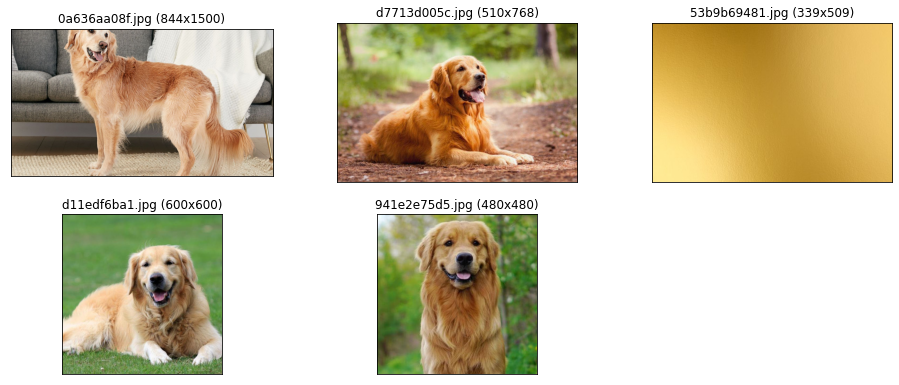

In [28]:
import matplotlib.pyplot as plt
import cv2

plt.rcParams["figure.figsize"] = (16,10) 

for index, image in enumerate(os.listdir(folder)):
  img = cv2.imread(folder+"/"+image)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  plt.subplot(3, 3, index+1), plt.imshow(img)

  plt.title(image+" ("+str(img.shape[0])+"x"+str(img.shape[1])+")")
  plt.xticks([]), plt.yticks([])